# Portfolio assignment 12
30 min: Perform a bivariate analysis on at least 3 combinations of a numerical column with a categorical column in the dataset that you chose in portfolio assignment 4. Use <em>.groupby('columnname').mean()</em> to calculate the means. Is there a difference between categories? Then use seaborn barplots to check if there is a statistically significant difference. 

### Attibute information
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- thalach = maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as st

In [2]:
sns.set_theme(style="whitegrid")

In [4]:
heart = pd.read_csv('Assignment 4 - Heart.csv', sep=',')

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Transformation

In [6]:
heart.sex = heart.sex.map( {0:"Female" , 1:"Male"} )
heart.fbs = heart.fbs.map( {0:False , 1:True} )
heart.exang = heart.exang.map( {0:False , 1:True} )
heart.target = heart.target.map( {0:"No diseas", 1:"Disease"})
heart.thal = heart.thal.map( {0:"Normal", 1:"Fixed defect", 2:"Reversable defect"})
heart.cp = heart.cp.map( {0:"None", 1:"Minor", 2:"Severe", 3:"Major"})
heart.slope = heart.slope.map( {0:"None", 1:"Minor", 2:"Major"})

In [7]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Major,145,233,True,0,150,False,2.3,None,0,Fixed defect,Disease
1,37,Male,Severe,130,250,False,1,187,False,3.5,None,0,Reversable defect,Disease
2,41,Female,Minor,130,204,False,0,172,False,1.4,Major,0,Reversable defect,Disease
3,56,Male,Minor,120,236,False,1,178,False,0.8,Major,0,Reversable defect,Disease
4,57,Female,None,120,354,False,1,163,True,0.6,Major,0,Reversable defect,Disease


## Sex vs Numerical

In [25]:
heart.groupby("sex").mean()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca
sex,,,,,,,,,
Female,55.677083,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,0.552083
Male,53.758454,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,0.811594


<AxesSubplot:xlabel='sex', ylabel='trestbps'>

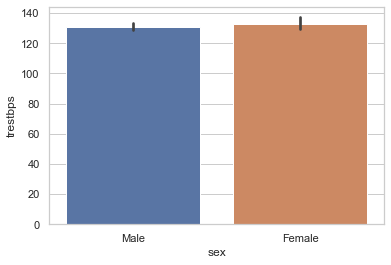

In [10]:
sns.barplot(y="trestbps", x="sex", data=heart) 

#### Op basis van deze gegevens kunnen we conluderen dat er geen tot weinig verschil is in resting blood pressure (in mm Hg on admission to the hospital) tussen mannen en vrouwen.

<AxesSubplot:xlabel='sex', ylabel='chol'>

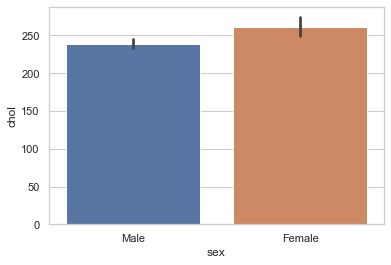

In [13]:
sns.barplot(y="chol", x="sex", data=heart) 

#### Op basis van deze gegevens kunnen we conluderen dat er een verschil is in serum cholestoral in mg/dl tussen mannen en vrouwen.

<AxesSubplot:xlabel='sex', ylabel='thalach'>

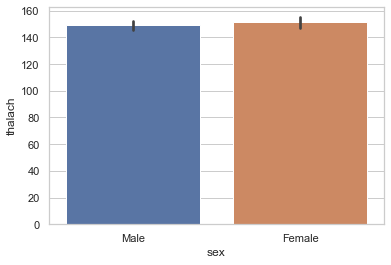

In [14]:
sns.barplot(y="thalach", x="sex", data=heart) 

#### Op basis van deze gegevens kunnen we conluderen dat er geen tot weinig verschil is in maximum heart rate tussen mannen en vrouwen.

## Chestpain vs Numerical

In [26]:
heart.groupby("cp").mean()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca
cp,,,,,,,,,
Major,55.869565,140.869565,237.130435,0.217391,0.391304,155.956522,0.173913,1.391304,0.478261
Minor,51.360000,128.400000,244.780000,0.100000,0.620000,162.420000,0.080000,0.316000,0.420000
None,55.692308,132.020979,250.132867,0.125874,0.475524,140.538462,0.559441,1.383217,0.965035
Severe,53.517241,130.379310,243.172414,0.195402,0.597701,155.609195,0.126437,0.797701,0.586207


<AxesSubplot:xlabel='cp', ylabel='trestbps'>

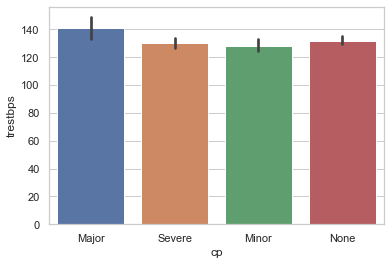

In [18]:
sns.barplot(y="trestbps", x="cp", data=heart) 

#### Op basis van deze gegevens kunnen we conluderen dat er geen tot weinig verschil is in resting blood pressure (in mm Hg on admission to the hospital) tussen severe, major, minor en geen chest pain.

<AxesSubplot:xlabel='cp', ylabel='chol'>

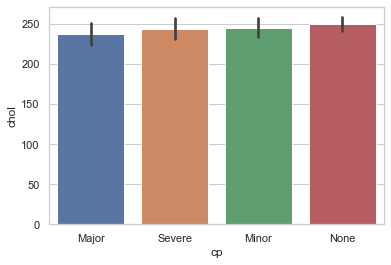

In [19]:
sns.barplot(y="chol", x="cp", data=heart) 

#### Op basis van deze gegevens kunnen we conluderen dat er geen tot weinig verschil is in serum cholestoral in mg/dl tussen major, severe, minor of geen chest pain.

<AxesSubplot:xlabel='cp', ylabel='thalach'>

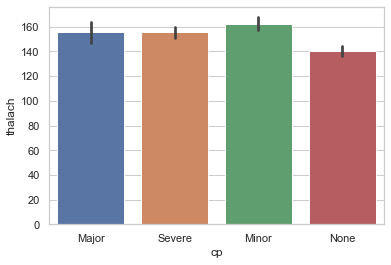

In [17]:
sns.barplot(y="thalach", x="cp", data=heart) 

#### Op basis van deze gegevens kunnen we conluderen dat er geen tot weinig verschil is in maximum heart rate tussen major, minor en severe chest pain. Echter kunnen we wel zien dat er een verschil is in maximum heart rate tussen geen chest pain en licht chest pain.

## Target vs numerical

In [27]:
heart.groupby("target").mean()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca
target,,,,,,,,,
Disease,52.496970,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,0.363636
No diseas,56.601449,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667


<AxesSubplot:xlabel='target', ylabel='trestbps'>

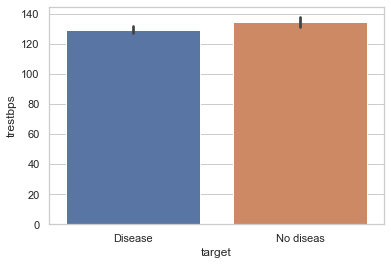

In [20]:
sns.barplot(y="trestbps", x="target", data=heart) 

#### Op basis van deze gegevens kunnen we conluderen dat er geen tot weinig verschil is in resting blood pressure (in mm Hg on admission to the hospital) tussen een voorgeschiendenis met hartziekte en een voorgeschiedenis zonder hartziekte.

<AxesSubplot:xlabel='target', ylabel='chol'>

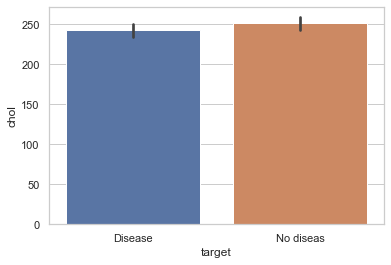

In [23]:
sns.barplot(y="chol", x="target", data=heart) 

#### Op basis van deze gegevens kunnen we conluderen dat er geen tot weinig verschil is in serum cholestoral in mg/dl tussen een voorgeschiendenis met hartziekte en een voorgeschiedenis zonder hartziekte.

<AxesSubplot:xlabel='target', ylabel='thalach'>

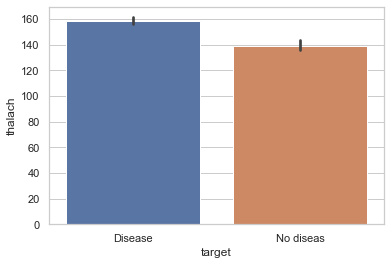

In [24]:
sns.barplot(y="thalach", x="target", data=heart) 

#### Op basis van deze gegevens kunnen we conluderen dat er een verschil is in maximum heart rate tussen een voorgeschiendenis met hartziekte en een voorgeschiedenis zonder hartziekte.